# 5. 이산형 확률변수

In [378]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

## 5.1. 1차원 이산형 확률변수

In [379]:
# 주사위 눈 정의
# 확률변수가 취할 수 있는 값의 집합 x_set
x_set = np.array([1,2,3,4,5,6])

In [380]:
# 불공정 주사위의 확률변수
def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0

In [381]:
# 확률분포: 확률변수가 취할 수 있는 값의 집합과 확률변수의 세트
# 확률변수 X의 동작은 확률분포로 결정
X = [x_set, f]

In [382]:
# x_k가 나올 확률 = p_k 는 확률변수로 구할 수 있다
prob = np.array([f(x_k) for x_k in x_set])

# x_k와 p_k의 대응을 사전식으로 표시
dict(zip(x_set, prob))

{np.int64(1): 0.048,
 np.int64(2): 0.095,
 np.int64(3): 0.143,
 np.int64(4): 0.190,
 np.int64(5): 0.238,
 np.int64(6): 0.286}

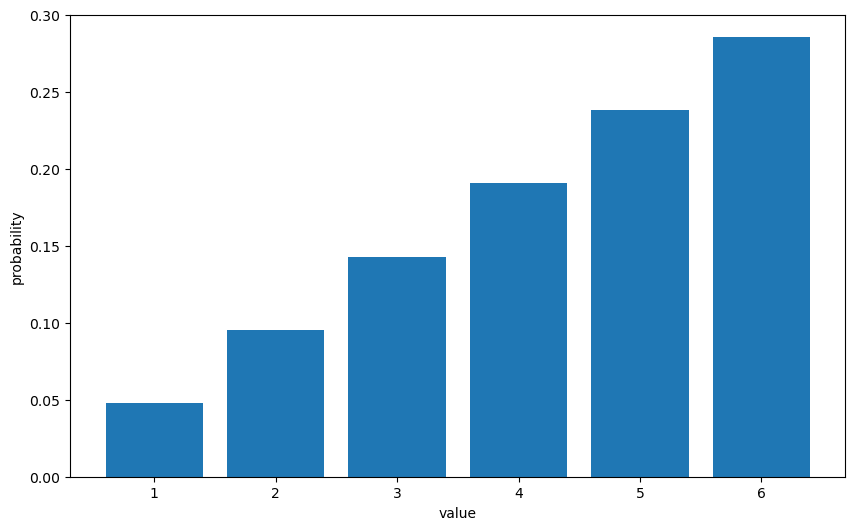

In [383]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel('value')
ax.set_ylabel('probability')

plt.show()

### +) dictionary 예제, 사용 및 출력 방법 참고용

In [384]:
a = {'apple':1, 'strawberry':5, 'orange':10}
a

{'apple': 1, 'strawberry': 5, 'orange': 10}

In [385]:
a = {('chocolate', 200):20, ('macaron', 500):15, ('cookie', 300):30}
a

{('chocolate', 200): 20, ('macaron', 500): 15, ('cookie', 300): 30}

In [386]:
a = {'apple':1, 'strawberry':5, 'orange':10}
v1 = a['strawberry']
v1

5

In [387]:
# 없어서 오류
# v2= a['lemmon']
# v2

In [388]:
f1 = 'strawberry' in a
f1

True

In [389]:
f2 = 'lemmon' not in a
f2

True

In [390]:
f3 = 'lemmon' in a
f3

False

In [391]:
v1 = a.get('strawberry')
v1

5

In [392]:
# 없는 값
v2 = a.get('lemmon')
v2

In [393]:
a = {'chocolate':1 , 'macaron':2, 'cookie':3}
a['chocolate'] = 'one'
a['macaron'] = 'two'
a['cookie'] = 'three'
a

{'chocolate': 'one', 'macaron': 'two', 'cookie': 'three'}

In [394]:
d = dict(choco=20, macaron=15, cookie=30)
d

{'choco': 20, 'macaron': 15, 'cookie': 30}

In [395]:
key = ['chocolate', 'macaron', 'cookie']
value = [20, 15, 30]
d = dict(zip(key, value))
d

{'chocolate': 20, 'macaron': 15, 'cookie': 30}

In [396]:
d = dict([('chocolate', 20), ('macaron', 15), ('cookie', 30)])
d

{'chocolate': 20, 'macaron': 15, 'cookie': 30}

### 확률의 성질

In [397]:
# np.all: 모든 요소가 True일 때 return True
# 모든 확률: 항상 0 이상
np.all(prob >= 0)
np.True_

np.True_

In [398]:
# 확률의 총합: 항상 1
np.sum(prob)

1.000

### 누적분포함수 정의

In [399]:
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [400]:
F(3)

0.286

### 확률변수 변환

In [401]:
# 확률변수가 취할 수 있는 값을 변환
# Y = 2X + 3
# Y의 확률분포 사전식 표시, 변환 후에도 **확률변수**이다.
y_set = np.array([2 * x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))

{np.int64(5): 0.048,
 np.int64(7): 0.095,
 np.int64(9): 0.143,
 np.int64(11): 0.190,
 np.int64(13): 0.238,
 np.int64(15): 0.286}

### 기댓값

In [402]:
# 기댓값 = 확률변수 평균
#       = 무한번 시행해 얻은 평균
np.sum([x_k * f(x_k) for x_k in x_set])

4.333


### +) 데이터 샘플링: 데이터 집합 중 일부를 무작위 추출

In [403]:
# replace=False:한 번 선택한 건 다시 선택하지 않도록 지정
# suffle 명령과 같다
# np.random.choice(어떤 범위에서, n번, 중복 허용 등의 조건)
np.random.choice(5, 5, replace=False)

array([2, 1, 4, 3, 0], dtype=int32)

In [404]:
np.random.choice(5, 3, replace=False)

array([2, 3, 1], dtype=int32)

In [405]:
# default: replace=True
# 중복 허용이 기본값
np.random.choice(5, 10)

array([2, 0, 4, 0, 4, 3, 3, 4, 3, 3], dtype=int32)

In [406]:
# p=[] 통해 선택 확률 다르게 지정 可
np.random.choice(5, 10, p=[0.1, 0, 0.3, 0.6, 0])

array([3, 2, 3, 3, 3, 3, 2, 3, 2, 3], dtype=int32)

### 기댓값 함수(lambda는 시험x)

In [407]:
# 주사위 100만(10^6)번 굴린 값의 평균
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.334

In [408]:
# 이산형 확률변수 기댓값을 함수로 구현
def E(X, g=lambda x: x):
    x_set, f= X
    return np.sum([g(x_k) *f(x_k) for x_k in x_set])

In [409]:
# 기댓값의 선형성
2 * E(X) + 3

11.667

### 분산

In [410]:
# 불공정 주사위의 분산
mean = E(X)
# 이산형 변수의 분산 = 편차^2 의 기대값
np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set])

2.222

In [411]:
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

In [412]:
V(X)

2.222

In [413]:
V(X, lambda x: 2*x + 3)

8.889

In [414]:
# V(2X + 3) = 2^2 * V(X)
2**2 *V(X)

8.889

## 5.2. 2차원 이산형 확률변수

### 결합확률분포: 1차원 확률분포 2개를 조합

In [415]:
# 불공정 주사위 2개 합 x, 그 중 1개인 y
x_set = np.arange(2, 13)
y_set = np.arange(1, 7)

#### 결합 확률 함수 f_XY

In [416]:
# 두 눈이 모두 1-6 범위인지 확인
# 맞다면 f_XY=확률 곱, 아니라면 0
def f_XY(x, y):
    if 1<=y<= 6 and 1<=x-y<=6:
        return y * (x-y) / 441
    else:
        return 0

In [417]:
XY = [x_set, y_set, f_XY]

#### 확률 분포 히트맵

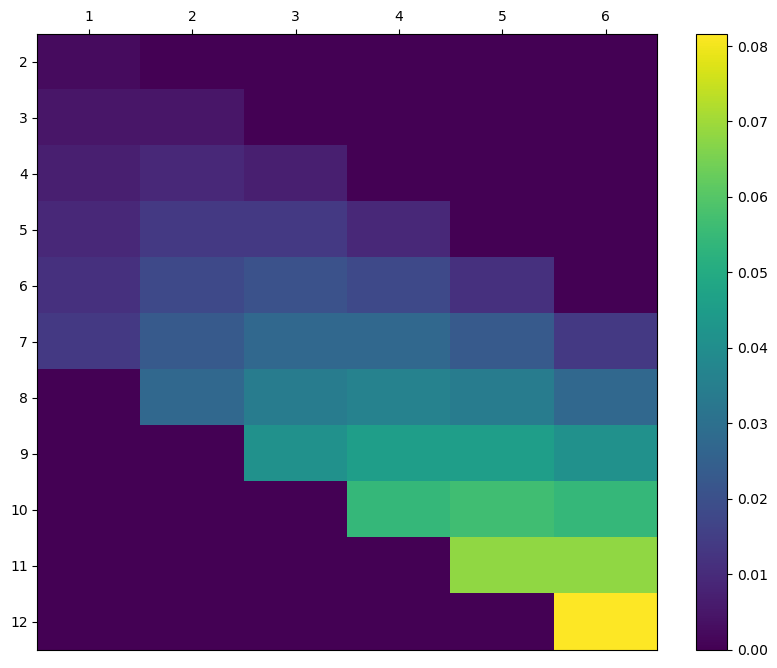

In [418]:
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set] for x_i in x_set])
fig = plt.figure(figsize=(10,8))
ax= fig.add_subplot(111)

c= ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1,7), minor=False)
ax.set_yticklabels(np.arange(2,13), minor=False)

# y축을 내림차순으로 만들어 위아래 역전시킨다
ax.invert_yaxis()
# x축 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

#### 확률의 성질

In [419]:
# 모든 확률은 0보다 크며,
np.all(prob>= 0)

np.True_

In [420]:
# 모든 확률의 합은 1이다
np.sum(prob)

1.000

### 주변확률분포: 결합확률에서 1개의 확률 변수만

#### X의 주변확률함수 f_X

In [421]:
# f_XY에서 y의 영향을 제거하면 f_X
# y 값에 상관없는 x만의 확률을 구하기 위해, 가능한 모든 y경우를 합산
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

#### Y의 주변확률함수 f_Y

In [422]:
# f_XY에서 x의 영향을 제거하면 f_Y
# x 값에 상관없는 y만의 확률을 구하기 위해, 가능한 모든 x경우를 합산
def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

#### 주변확률분포

In [423]:
X = [x_set, f_X]
Y = [y_set, f_Y]

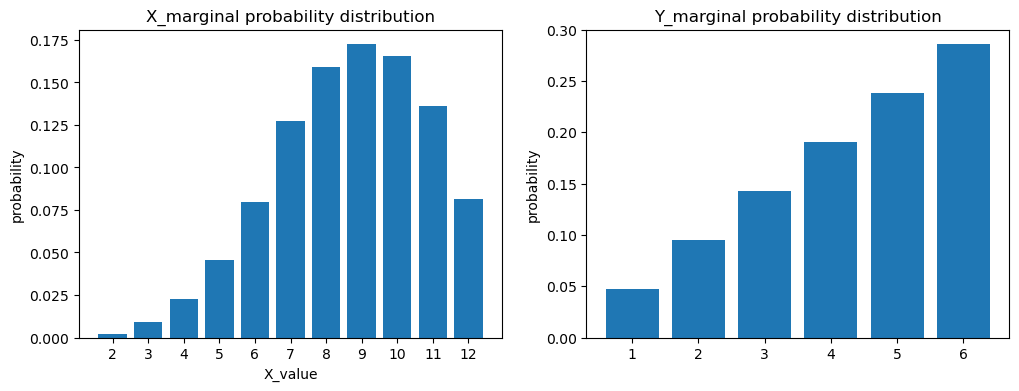

In [424]:
prob_x= np.array([f_X(x_k) for x_k in x_set])
prob_y= np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# x_주변확률분포
ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

# y_주변확률분포
ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_ylabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

### 기댓값(확률 평균)

#### X의 기댓값

In [425]:
# X의 기댓값 = x_i * 확률
np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

8.667

#### 기댓값 함수 E

In [426]:
# Expectation
# X, Y의 기댓값 = g(x_i, y_j) * 확률
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

#### 기댓값의 선형성(실수 곱해도 ㄱㅊ단 성질): E(a * X + b * Y) = a * E(X) + b * E(Y)

In [427]:
mean_X = E(XY, lambda x, y: x)
mean_X

8.667

In [428]:
mean_Y = E(XY, lambda x, y: y)
mean_Y

4.333

In [429]:
a, b = 2, 3

In [430]:
# E(a*X + b*Y)는
E(XY, lambda x, y: a*x + b*y)

30.333

In [431]:
# a*E(X) + b*E(Y)와 같다
a*mean_X + b*mean_Y

30.333

#### 분산= 편차^2의 기대값

In [432]:
np.sum([(x_i-mean_X)**2 * f_XY(x_i, y_j)
       for x_i in x_set for y_j in y_set])

4.444

#### 분산 함수 V

In [433]:
def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum([(g(x_i, y_j)-mean)**2 * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

#### X, Y 분산

In [434]:
# X 분산
var_X = V(XY, g=lambda x, y: x)
var_X

4.444

In [435]:
# Y 분산
var_Y = V(XY, g=lambda x, y: y)
var_Y

2.222

#### 공분산 함수 Cov (공분산: 편차 곱의 기댓값)

In [436]:
# x,y 공분산 = x편차 * y편차 * 확률
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X)* (y_j-mean_Y) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

#### x, y 공분산

In [437]:
cov_xy = Cov(XY)
cov_xy

2.222

#### 분산, 공분산 공식: **V(aX + bY) = a^2 * V(X)** +  **b^2 * V(Y)**  +  **2ab * Cov(X, Y)**

In [438]:
V(XY, lambda x, y: a*x + b*y)

64.444

In [439]:
a**2 * var_X + b**2 * var_Y + 2*a*b *cov_xy

64.444

#### 상관계수: **공분산 / 표준편차**, 상관관계의 정도, (1부터 -1까지의 값)

In [440]:
# 공분산 / 표준편차
# 분산: 편차^2 이용하므로 제곱근(sqrt) 취함
cov_xy / np.sqrt(var_X * var_Y)

0.707